# Correcting the Optical flow accross the image

The optical flow is not constant across the frame.  It increases closer to the edges

This must be corrected

In [1]:
user = 'marcvanzyl'
user = 'gerrie'

In [2]:
import numpy as np
import cv2, os
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pickle
%matplotlib inline

# Load the list of files

In [8]:
datadir = "/Users/{}/Google Drive/ScienceFair2021/DataCapture/smooth/".format(user)


data_files = np.array([f for f in os.listdir(datadir) if f.endswith("res4.p") ])

# just sorts the files according to the number so we match picture 1_A with 1_C etc
#orderR = np.argsort([int((p.split('_')[-1]).split('.')[0]) for p in video_files])
#video_files = video_files[orderR]
data_files.sort()

In [9]:
data_files

array(['Smooth_15_-2_0_4623HF_res4.p', 'Smooth_15_-2_1_QV4WNZ_res4.p',
       'Smooth_30_-4_0_9WKFQF_res4.p', 'Smooth_45_-6_0_R378Z4_res4.p'],
      dtype='<U28')

In [10]:
# grab one 60mm/s 0deg/s file
file_name = 'Smooth_45_-6_0_R378Z4_res4.p'

# load the result file
res = pickle.load(open('{}{}'.format(datadir, file_name), 'rb'))

In [11]:
res

,AM0,AM1,AM2,AM3,AM4,AM5,AM6,AM7,AM8,AM9,...,OFC2,OFC3,OFC4,OFC5,OFZ0,OFZ1,OFZ2,OFZ3,OFZ4,OFZ5
27,NaN,NaN,"[711.90326, 1915.3691]","[1518.6165, 1853.5743]","[2197.1372, 1800.9453]",NaN,NaN,"[766.5366, 1108.6898]","[1373.0581, 1112.8483]","[1911.4196, 1122.2235]",...,"[463.27588, 1106.6106]","[1069.7974, 1110.769]","[426.08978, 682.45746]","[949.5419, 702.7103]",19.547125,16.210600,18.263840,15.954132,18.211151,16.104193
28,NaN,NaN,"[730.1343, 1913.5845]","[1534.7869, 1853.6676]","[2213.882, 1802.4303]",NaN,NaN,"[785.062, 1108.6721]","[1389.9374, 1113.0391]","[1927.9288, 1122.9215]",...,"[482.62433, 1106.4886]","[1087.4998, 1110.8556]","[476.40115, 691.56714]","[967.4479, 703.43384]",19.798792,16.474295,18.521088,16.237814,18.028088,16.366664
29,NaN,NaN,"[745.9523, 1911.7]","[1549.7844, 1853.8259]","[2229.1997, 1803.7772]",NaN,NaN,"[801.9109, 1108.6569]","[1404.9868, 1113.5359]","[1943.0947, 1123.5415]",...,"[500.37292, 1106.2173]","[1103.4489, 1111.0964]","[462.5785, 683.4577]","[983.8951, 704.23755]",19.760222,16.515100,18.644113,16.383542,18.671518,16.568178
30,NaN,NaN,"[762.58997, 1910.0671]","[1564.0782, 1853.9095]","[2243.14, 1804.8436]",NaN,NaN,"[817.1992, 1108.67]","[1418.7953, 1113.7473]","[1956.6606, 1124.1106]",...,"[516.4012, 1106.1313]","[1117.9973, 1111.2087]","[479.8038, 683.7737]","[998.7104, 704.9264]",19.322778,16.218492,18.325229,16.141669,18.379060,16.336847
31,NaN,NaN,"[781.1647, 1908.5466]","[1579.25, 1853.5]","[2258.641, 1806.4197]",NaN,NaN,"[834.0, 1108.25]","[1433.7635, 1113.8524]","[1970.5, 1124.25]",...,"[534.1182, 1105.4487]","[1133.8818, 1111.0513]","[497.22772, 685.0138]","[1013.7092, 705.5108]",18.886510,15.894510,17.877675,15.779623,17.904626,15.953827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,"[519.83514, 1781.3481]","[1241.6084, 1850.633]","[2007.3004, 1913.3829]","[2841.1545, 1988.0117]",NaN,"[904.8157, 1080.4711]","[1454.4204, 1109.5244]","[2034.1086, 1139.5211]","[2649.2908, 1173.7219]",NaN,...,"[1744.2645, 1124.5227]","[2341.6997, 1156.6216]","[1726.8018, 733.2008]","[2198.8066, 745.9153]",15.778101,17.407364,15.683191,16.875159,15.484447,16.190276
106,"[537.2411, 1779.7708]","[1257.7284, 1850.837]","[2023.5642, 1915.0925]","[2860.8994, 1991.7988]",NaN,"[920.8196, 1080.623]","[1469.4688, 1109.9608]","[2049.5889, 1140.3644]","[2666.7817, 1174.8276]",NaN,...,"[1759.5288, 1125.1626]","[2358.1853, 1157.596]","[1741.501, 733.8259]","[2214.4382, 746.3464]",15.718111,17.440860,15.409390,16.617725,15.202882,15.929422
107,"[557.76544, 1778.2589]","[1274.5425, 1850.7197]","[2041.9143, 1917.0559]","[2882.458, 1996.0875]",NaN,"[938.5967, 1080.8862]","[1486.9791, 1110.5521]","[2067.503, 1141.3381]","[2686.6528, 1176.3976]",NaN,...,"[1777.241, 1125.9451]","[2377.078, 1158.8679]","[1758.456, 734.2728]","[2232.012, 746.8098]",15.852859,17.623801,15.618129,16.863614,15.270132,16.068040
108,"[577.713, 1776.8289]","[1293.2042, 1851.2706]","[2060.087, 1919.0327]","[2904.774, 2000.6542]",NaN,"[956.67395, 1081.3247]","[1504.386, 1110.9258]","[2085.5652, 1142.2852]","[2706.9783, 1177.8901]",NaN,...,"[1794.9756, 1126.6055]","[2396.2717, 1160.0876]","[1775.7458, 734.77026]","[2250.414, 747.1007]",16.230042,18.147481,15.848265,17.173230,15.517363,16.349652


<AxesSubplot:>

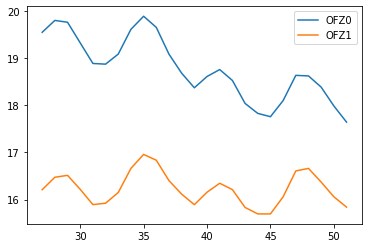

In [12]:
res[['OFZ0', 'OFZ1']][0:25].plot()

In [26]:
frame_x = 3264
mid_frame_x = 3264/2

In [27]:
# Get x positions of the centers

for zone in range(6):    
    res['OFZ{}x'.format(zone)] = res['OFC{}'.format(zone)].apply(lambda x: x[0]-mid_frame_x)

res.columns

Index(['AM0', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'AM6', 'AM7', 'AM8', 'AM9',
       'AM10', 'AM11', 'AM12', 'AM13', 'AM14', 'OFC0', 'OFC1', 'OFC2', 'OFC3',
       'OFC4', 'OFC5', 'OFZ0', 'OFZ1', 'OFZ2', 'OFZ3', 'OFZ4', 'OFZ5', 'OFZ0x',
       'OFZ1x', 'OFZ2x', 'OFZ3x', 'OFZ4x', 'OFZ5x'],
      dtype='object')

In [28]:
res.columns[res.columns.str.contains('OFC')]

Index(['OFC0', 'OFC1', 'OFC2', 'OFC3', 'OFC4', 'OFC5'], dtype='object')

In [29]:
res[(res.index>71)&(res.index<91)][['OFZ0', 'OFZ1']]

,OFZ0,OFZ1
72,17.076903,16.671693
73,17.051276,16.705647
74,16.695714,16.400215
75,16.302634,16.085995
76,16.041147,15.888551
77,16.208289,16.113881
78,16.398721,16.373148
79,16.336186,16.380623
80,16.135532,16.218639
81,15.925047,16.086142


In [30]:
res[(res.index>71)&(res.index<91)].mean()

AM0       214.523819
AM1       842.232483
AM2      1618.926514
AM3      2404.295654
AM4      3014.061279
AM5       485.471069
AM6      1070.335449
AM7      1652.511841
AM8      2236.837646
AM9      2822.669678
AM10      646.810852
AM11     1116.485474
AM12     1584.356445
AM13     2046.521851
AM14     2502.254639
OFC0     1230.579468
OFC1     2011.610840
OFC2     1361.423584
OFC3     1944.674561
OFC4     1350.421021
OFC5     1815.439087
OFZ0       16.367729
OFZ1       16.538438
OFZ2       15.961639
OFZ3       16.104666
OFZ4       15.754002
OFZ5       15.686256
OFZ0x    -401.420481
OFZ1x     379.611039
OFZ2x    -270.576339
OFZ3x     312.674650
OFZ4x    -281.579044
OFZ5x     183.439151
dtype: float64

In [31]:
OFactual = res.mean()[['OFZ0','OFZ1']].mean()
OFactual

16.86209653371788

In [32]:
# Check zone 0 and 1

y = (res['OFZ0'] - res['OFZ1'])/OFactual

x = (res['OFZ0x']*res['OFZ0x'] - res['OFZ1x']*res['OFZ1x'])

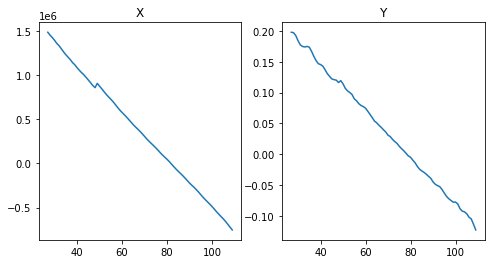

In [33]:
fix, ax = plt.subplots(1,2, figsize=(8, 4))
ax[0].plot(x)
ax[0].set_title('X')
ax[1].plot(y)
ax[1].set_title('Y')
plt.show()

<ipython-input-34-bd8d045d6b49>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coeff = np.linalg.lstsq(matrix, y)[0]    # lstsq returns some additional info we ignore


Coefficients [1.35502119e-07]


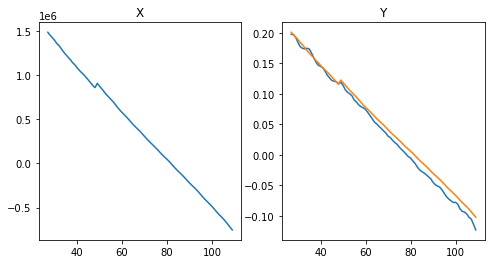

In [34]:

degrees = [1]       # list of degrees of x to use
matrix = np.stack([x**d for d in degrees], axis=-1)   # stack them like columns
coeff = np.linalg.lstsq(matrix, y)[0]    # lstsq returns some additional info we ignore
print("Coefficients", coeff)
fit = np.dot(matrix, coeff)


fix, ax = plt.subplots(1,2, figsize=(8, 4))
ax[0].plot(x)
ax[0].set_title('X')
ax[1].plot(y)
ax[1].plot(y.index,fit)


ax[1].set_title('Y')
plt.show()

<ipython-input-35-6734be5089d3>:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coeff = np.linalg.lstsq(matrix, y)[0]    # lstsq returns some additional info we ignore


Coefficients [1.33593114e-07]


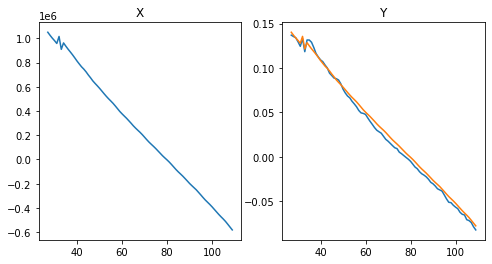

In [35]:
# Check zone 0 and 1
z1 = 2
z2 = 3
y = (res['OFZ{}'.format(z1)] - res['OFZ{}'.format(z2)])/OFactual

x = (res['OFZ{}x'.format(z1)]*res['OFZ{}x'.format(z1)] - res['OFZ{}x'.format(z2)]*res['OFZ{}x'.format(z2)])

degrees = [1]       # list of degrees of x to use
matrix = np.stack([x**d for d in degrees], axis=-1)   # stack them like columns
coeff = np.linalg.lstsq(matrix, y)[0]    # lstsq returns some additional info we ignore
print("Coefficients", coeff)
fit = np.dot(matrix, coeff)


fix, ax = plt.subplots(1,2, figsize=(8, 4))
ax[0].plot(x)
ax[0].set_title('X')
ax[1].plot(y)
ax[1].plot(y.index,fit)


ax[1].set_title('Y')
plt.show()

In [36]:
# camera parameters
f = 3.04
chip = 3.68
resolution = 3264

In [37]:
i=0
np.max(1./np.power(np.cos(np.arctan((res['OFZ{}x'.format(i)]*chip/resolution)/f)),2.0))

1.2409158856426965

In [157]:
#rotational_coeff = 2.08

In [ ]:
# for the corrected charts
for i in range(6):
    res['OFZCorrected{}'.format(i)] = (res['OFZ{}'.format(i)] + 12.3 +
                                    rotational_coeff*rot_vel/
                                    (np.power(np.cos(1.15*np.arctan((res['OFZ{}x'.format(i)]*chip/resolution)/f)),2.0)))




In [42]:
for i in range(6):
    res['OFZLinear{}'.format(i)] = (res['OFZ{}'.format(i)] + 
                                    rotational_coeff*rot_vel/
                                    (np.power(np.cos(np.arctan((res['OFZ{}x'.format(i)]*chip/resolution)/f)),2.0)))




<AxesSubplot:>

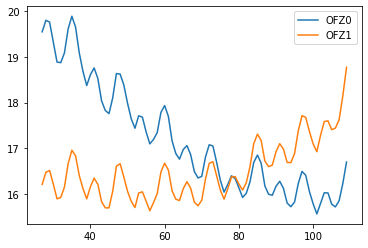

In [43]:
res[['OFZ0', 'OFZ1']].plot()

<AxesSubplot:>

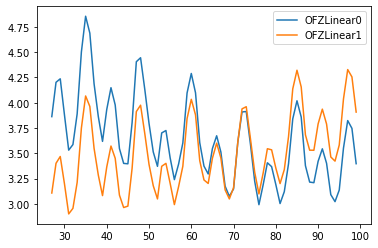

In [44]:
res[['OFZLinear0', 'OFZLinear1']][:-10].plot()

In [45]:
res.columns

Index(['AM0', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'AM6', 'AM7', 'AM8', 'AM9',
       'AM10', 'AM11', 'AM12', 'AM13', 'AM14', 'OFC0', 'OFC1', 'OFC2', 'OFC3',
       'OFC4', 'OFC5', 'OFZ0', 'OFZ1', 'OFZ2', 'OFZ3', 'OFZ4', 'OFZ5', 'OFZ0x',
       'OFZ1x', 'OFZ2x', 'OFZ3x', 'OFZ4x', 'OFZ5x', 'OFZCorrected0',
       'OFZCorrected1', 'OFZCorrected2', 'OFZCorrected3', 'OFZCorrected4',
       'OFZCorrected5', 'OFZLinear0', 'OFZLinear1', 'OFZLinear2', 'OFZLinear3',
       'OFZLinear4', 'OFZLinear5'],
      dtype='object')

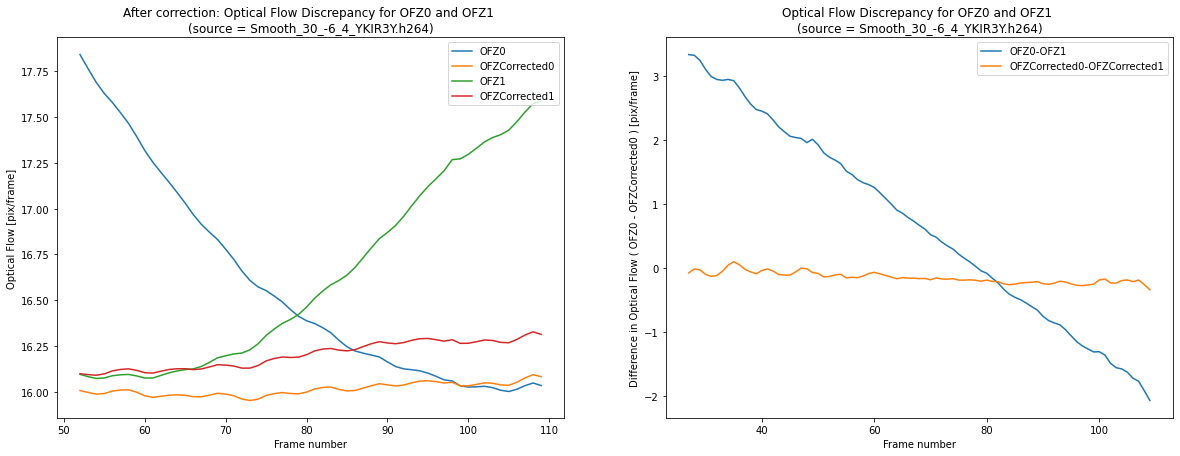

In [48]:
zones = ['OFZ0','OFZCorrected0','OFZ1', 'OFZCorrected1']
plot_data = res[zones].rolling(24, min_periods=12, center=True, win_type=None, on=None, axis=0, closed=None).mean()
plot_data = plot_data[25:]
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(20,7))
ax1.plot(plot_data.index, plot_data[zones])
ax1.set_title('After correction: Optical Flow Discrepancy for {} and {} \n(source = Smooth_30_-6_4_YKIR3Y.h264)'.format(zones[0], zones[2]))
ax1.set_xlabel('Frame number')
ax1.set_ylabel('Optical Flow [pix/frame]')
ax1.legend(zones, loc='upper right')

diff_df = pd.DataFrame()

diff_df['{}-{}'.format(zones[0], zones[2])] = res[zones[0]] -  res[zones[2]]
diff_df['{}-{}'.format(zones[1], zones[3])] = res[zones[1]] -  res[zones[3]]


ax2.plot(diff_df.index, diff_df)
ax2.set_title('Optical Flow Discrepancy for {} and {} \n(source = Smooth_30_-6_4_YKIR3Y.h264)'.format(zones[0], zones[2]))
ax2.set_xlabel('Frame number')
ax2.set_ylabel('Difference in Optical Flow ( {} - {} ) [pix/frame]'.format(zones[0], zones[1]))
ax2.legend(diff_df.columns, loc='upper right')

plt.show()

# Create the function to iterate through all the files

In [51]:
file_name.split('_')

['Smooth', '45', '-6', '0', 'R378Z4', 'res4.p']

In [52]:
# camera parameters
f = 3.04
chip = 3.68
resolution = 3264
#rotational_coeff=2.2

In [53]:
full_rotational_coeff_result = pickle.load(open('{}{}'.format("/Users/{}/Google Drive/ScienceFair2021/DataCapture/rotate/".format(user),
                                                              'full_rotational_coeff_result.p'),'rb'))

In [54]:
full_rotational_coeff_result

,FileName,RotVel,OFZ0,OFZ1,OFZ2,OFZ3,OFZ4,OFZ5
Rotate_detailed_0_-2_0_KLWXZ0_res2.p,Rotate_detailed_0_-2_0_KLWXZ0_res2.p,-2.0,2.056225,2.067672,2.144868,2.152904,2.193746,2.196008
Rotate_detailed_0_-2_1_7LVM88_res2.p,Rotate_detailed_0_-2_1_7LVM88_res2.p,-2.0,2.058103,2.067182,2.147096,2.152967,2.196998,2.197407
Rotate_detailed_0_-2_2_ZKKG6S_res2.p,Rotate_detailed_0_-2_2_ZKKG6S_res2.p,-2.0,2.050536,2.056927,2.138419,2.142444,2.188277,2.186874
Rotate_detailed_0_-2_3_GZVYHT_res2.p,Rotate_detailed_0_-2_3_GZVYHT_res2.p,-2.0,2.052810,2.059701,2.141578,2.145980,2.191408,2.190116
Rotate_detailed_0_-2_4_WBF763_res2.p,Rotate_detailed_0_-2_4_WBF763_res2.p,-2.0,2.060589,2.059750,2.150927,2.147213,2.200850,2.194379
Rotate_detailed_0_-3_0_O74YQ6_res2.p,Rotate_detailed_0_-3_0_O74YQ6_res2.p,-3.0,2.062606,2.062114,2.167241,2.163830,2.225334,2.218770
Rotate_detailed_0_-3_1_EEWLW3_res2.p,Rotate_detailed_0_-3_1_EEWLW3_res2.p,-3.0,2.062407,2.061813,2.167003,2.163263,2.224995,2.218197
Rotate_detailed_0_-3_2_4WBIRV_res2.p,Rotate_detailed_0_-3_2_4WBIRV_res2.p,-3.0,2.062665,2.062133,2.166944,2.163610,2.224985,2.218316
Rotate_detailed_0_-3_3_X82PSI_res2.p,Rotate_detailed_0_-3_3_X82PSI_res2.p,-3.0,2.062835,2.062397,2.167428,2.164175,2.225438,2.218973
Rotate_detailed_0_-3_4_K6ISJK_res2.p,Rotate_detailed_0_-3_4_K6ISJK_res2.p,-3.0,2.063124,2.062615,2.167883,2.164625,2.226059,2.219378


In [42]:
rotational_coeff = pd.Series([2.049529, 2.051370,2.160106,2.158514,2.221120,2.215871],
                            index=['OFZ0', 'OFZ1', 'OFZ2', 'OFZ3', 'OFZ4', 'OFZ5'])

In [55]:
rotational_coeff = full_rotational_coeff_result[['OFZ0', 'OFZ1', 'OFZ2', 'OFZ3', 'OFZ4', 'OFZ5']].mean()

In [56]:
full_rotational_coeff_result= full_rotational_coeff_result.groupby('RotVel').mean()

In [57]:
full_rotational_coeff_result

,OFZ0,OFZ1,OFZ2,OFZ3,OFZ4,OFZ5
RotVel,,,,,,
-6.0,2.050132,2.052158,2.160568,2.159096,2.221415,2.216294
-5.0,2.047359,2.048249,2.158497,2.156158,2.220114,2.214244
-4.0,2.051407,2.051190,2.160981,2.157737,2.221843,2.215275
-3.0,2.062727,2.062215,2.167300,2.163901,2.225362,2.218727
-2.0,2.055653,2.062246,2.144578,2.148301,2.194256,2.192957


Smooth_15_-2_0_4623HF_res2.p
Rot_vel -2.0 15.0
Smooth_15_-2_0_4623HF_res3.p
(296, 27)
OFZLinear0-OFZLinear1 Avg: 8.949270982709255 8.563552645299191 avg: 0.38571833741006323  delta: 8.756411814004224
OFZLinear2-OFZLinear3 Avg: 6.9622177936835765 6.7208992001237995 avg: 0.24131859355977703  delta: 6.841558496903688
OFZLinear4-OFZLinear5 Avg: 5.786933586853025 5.616112512509007 avg: 0.17082107434401816  delta: 5.7015230496810165


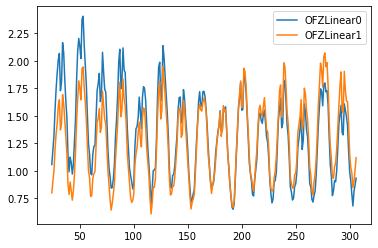

Smooth_15_-2_1_QV4WNZ_res2.p
Rot_vel -2.0 15.0
Smooth_15_-2_1_QV4WNZ_res3.p
(296, 27)
OFZLinear0-OFZLinear1 Avg: 9.190989952286083 8.600318123568613 avg: 0.5906718287174701  delta: 8.895654037927347
OFZLinear2-OFZLinear3 Avg: 7.131167712514911 6.771250122030549 avg: 0.3599175904843612  delta: 6.95120891727273
OFZLinear4-OFZLinear5 Avg: 5.9382223489319665 5.693015806192455 avg: 0.2452065427395116  delta: 5.815619077562211


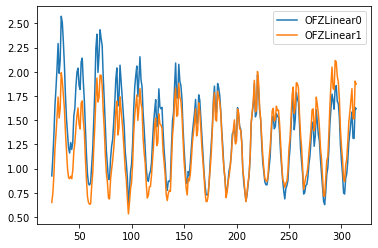

Smooth_15_-2_2_JB90U4_res2.p
Rot_vel -2.0 15.0
Smooth_15_-2_2_JB90U4_res3.p
(296, 27)
OFZLinear0-OFZLinear1 Avg: 9.177304583190358 8.579739614728474 avg: 0.5975649684618833  delta: 8.878522098959415
OFZLinear2-OFZLinear3 Avg: 7.116019822018928 6.75255624112422 avg: 0.36346358089470776  delta: 6.934288031571574
OFZLinear4-OFZLinear5 Avg: 5.924489294546385 5.679275114737357 avg: 0.24521417980902793  delta: 5.8018822046418705


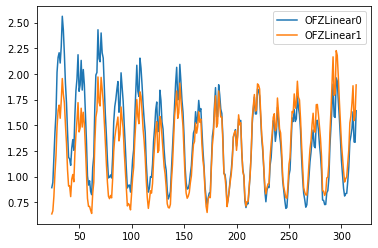

Smooth_15_-2_3_MCDNNA_res2.p
Rot_vel -2.0 15.0
Smooth_15_-2_3_MCDNNA_res3.p
(296, 27)
OFZLinear0-OFZLinear1 Avg: 9.181962887702861 8.588931212058702 avg: 0.5930316756441592  delta: 8.885447049880781
OFZLinear2-OFZLinear3 Avg: 7.124900884564961 6.760873160493159 avg: 0.36402772407180173  delta: 6.94288702252906
OFZLinear4-OFZLinear5 Avg: 5.930937865612811 5.684180204490353 avg: 0.24675766112245778  delta: 5.807559035051582


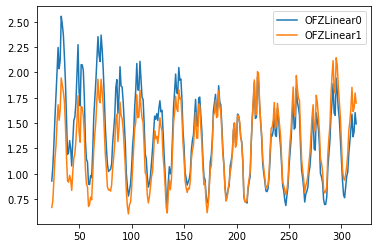

Smooth_15_-2_4_VIWO2O_res2.p
Rot_vel -2.0 15.0
Smooth_15_-2_4_VIWO2O_res3.p
(296, 27)
OFZLinear0-OFZLinear1 Avg: 9.809102595726014 9.219935928946771 avg: 0.5891666667792421  delta: 9.514519262336393
OFZLinear2-OFZLinear3 Avg: 7.736365225126282 7.383376053356548 avg: 0.35298917176973443  delta: 7.5598706392414154
OFZLinear4-OFZLinear5 Avg: 6.539909141814052 6.294842273851353 avg: 0.2450668679626986  delta: 6.4173757078327025


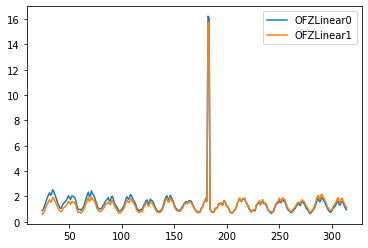

Smooth_15_-4_0_ESS22N_res2.p
Rot_vel -4.0 15.0
Smooth_15_-4_0_ESS22N_res3.p
(138, 27)
OFZLinear0-OFZLinear1 Avg: 9.142501968689071 8.646889469760584 avg: 0.49561249892848735  delta: 8.894695719224828
OFZLinear2-OFZLinear3 Avg: 6.898041481621645 6.64172207264657 avg: 0.25631940897507466  delta: 6.769881777134108
OFZLinear4-OFZLinear5 Avg: 5.589699532875779 5.442813017927764 avg: 0.1468865149480143  delta: 5.516256275401771


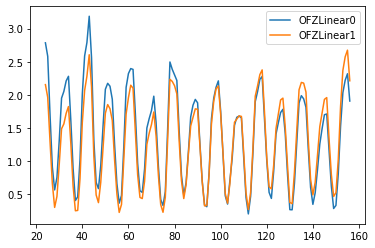

Smooth_15_-4_1_8GD6QO_res2.p
Rot_vel -4.0 15.0
Smooth_15_-4_1_8GD6QO_res3.p
(138, 27)
OFZLinear0-OFZLinear1 Avg: 9.159861640165506 8.654768456947416 avg: 0.50509318321809  delta: 8.90731504855646
OFZLinear2-OFZLinear3 Avg: 6.905729250218057 6.64575859357025 avg: 0.2599706566478073  delta: 6.775743921894153
OFZLinear4-OFZLinear5 Avg: 5.59041496126176 5.437235513097933 avg: 0.15317944816382667  delta: 5.513825237179846


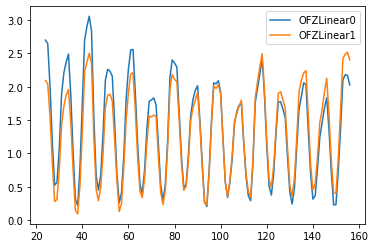

Smooth_15_-4_2_FMBNMX_res2.p
Rot_vel -4.0 15.0
Smooth_15_-4_2_FMBNMX_res3.p
(138, 27)
OFZLinear0-OFZLinear1 Avg: 9.17000426194626 8.653479359196279 avg: 0.5165249027499819  delta: 8.91174181057127
OFZLinear2-OFZLinear3 Avg: 6.896473755114303 6.627588870081465 avg: 0.26888488503283803  delta: 6.762031312597884
OFZLinear4-OFZLinear5 Avg: 5.576208744613743 5.4136348816849855 avg: 0.16257386292875786  delta: 5.4949218131493645


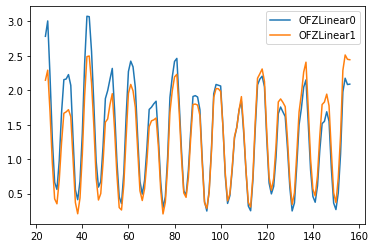

Smooth_15_-4_3_EEUONU_res2.p
Rot_vel -4.0 15.0
Smooth_15_-4_3_EEUONU_res3.p
(138, 27)
OFZLinear0-OFZLinear1 Avg: 8.368289598684346 8.792543758261635 avg: -0.4242541595772895  delta: 8.58041667847299
OFZLinear2-OFZLinear3 Avg: 6.281933534392128 6.668378903223666 avg: -0.3864453688315379  delta: 6.475156218807897
OFZLinear4-OFZLinear5 Avg: 5.013727539904732 5.269623255676194 avg: -0.2558957157714623  delta: 5.141675397790463


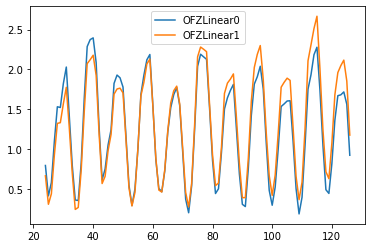

Smooth_15_-4_4_64CXH3_res2.p
Rot_vel -4.0 15.0
Smooth_15_-4_4_64CXH3_res3.p
(138, 27)
OFZLinear0-OFZLinear1 Avg: 9.176537459746527 8.63574335828624 avg: 0.5407941014602873  delta: 8.906140409016384
OFZLinear2-OFZLinear3 Avg: 6.896819991975916 6.611555796951977 avg: 0.28526419502393896  delta: 6.754187894463946
OFZLinear4-OFZLinear5 Avg: 5.5819851375662894 5.4102615985193605 avg: 0.17172353904692894  delta: 5.496123368042825


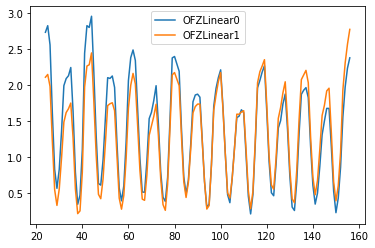

Smooth_15_-6_0_2HDNNZ_res2.p
Rot_vel -6.0 15.0
Smooth_15_-6_0_2HDNNZ_res3.p
(87, 27)
OFZLinear0-OFZLinear1 Avg: 11.170646235333109 10.260711854168301 avg: 0.909934381164808  delta: 10.715679044750704
OFZLinear2-OFZLinear3 Avg: 8.710018365287873 8.193863588986321 avg: 0.5161547763015513  delta: 8.451940977137097
OFZLinear4-OFZLinear5 Avg: 7.2726451088375885 6.9192002366678125 avg: 0.35344487216977605  delta: 7.0959226727527005


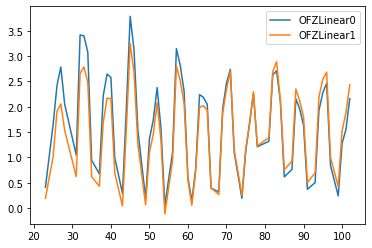

Smooth_15_-6_1_D23FV7_res2.p
Rot_vel -6.0 15.0
Smooth_15_-6_1_D23FV7_res3.p
(86, 27)
OFZLinear0-OFZLinear1 Avg: 9.481548475455998 8.845597462981734 avg: 0.6359510124742638  delta: 9.163572969218865
OFZLinear2-OFZLinear3 Avg: 7.143600025346816 6.820126883922671 avg: 0.3234731414241452  delta: 6.981863454634744
OFZLinear4-OFZLinear5 Avg: 5.794720711978736 5.594699034138653 avg: 0.20002167784008318  delta: 5.694709873058695


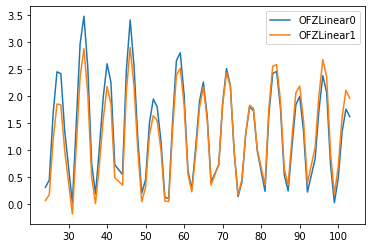

Smooth_15_-6_2_U8BJY4_res2.p
Rot_vel -6.0 15.0
Smooth_15_-6_2_U8BJY4_res3.p
(86, 27)
OFZLinear0-OFZLinear1 Avg: 9.638229258859445 8.967275353766777 avg: 0.6709539050926683  delta: 9.30275230631311
OFZLinear2-OFZLinear3 Avg: 7.285434026104689 6.939512023358252 avg: 0.3459220027464367  delta: 7.11247302473147
OFZLinear4-OFZLinear5 Avg: 5.941254256999355 5.729149014021286 avg: 0.212105242978069  delta: 5.8352016355103205


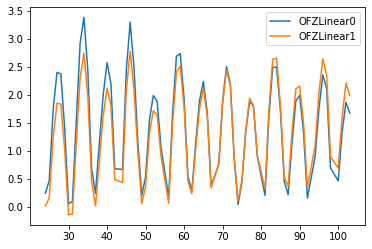

Smooth_15_-6_3_GK86VH_res2.p
Rot_vel -6.0 15.0
Smooth_15_-6_3_GK86VH_res3.p
(86, 27)
OFZLinear0-OFZLinear1 Avg: 9.526343032850589 8.922491852948397 avg: 0.6038511799021915  delta: 9.224417442899494
OFZLinear2-OFZLinear3 Avg: 7.211254382145088 6.8882178635854965 avg: 0.3230365185595918  delta: 7.049736122865292
OFZLinear4-OFZLinear5 Avg: 5.880791375809928 5.679169004563335 avg: 0.201622371246593  delta: 5.779980190186632


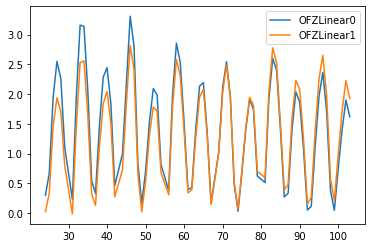

Smooth_15_-6_4_JU8DFH_res2.p
Rot_vel -6.0 15.0
Smooth_15_-6_4_JU8DFH_res3.p
(86, 27)
OFZLinear0-OFZLinear1 Avg: 9.37985733369231 8.77316360889341 avg: 0.6066937247988999  delta: 9.07651047129286
OFZLinear2-OFZLinear3 Avg: 7.074097719834434 6.739413428195719 avg: 0.33468429163871516  delta: 6.906755574015076
OFZLinear4-OFZLinear5 Avg: 5.735386830059667 5.538698836957224 avg: 0.19668799310244367  delta: 5.6370428335084455


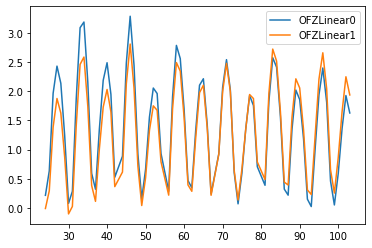

Smooth_15_0_0_D26LA1_res2.p
Rot_vel 0.0 15.0
Smooth_15_0_0_D26LA1_res3.p
(420, 27)
OFZLinear0-OFZLinear1 Avg: 8.612375668393886 8.509343486491257 avg: 0.10303218190262875  delta: 8.56085957744257
OFZLinear2-OFZLinear3 Avg: 6.462773482004801 6.420317807817846 avg: 0.04245567418695462  delta: 6.441545644911324
OFZLinear4-OFZLinear5 Avg: 5.198687367322967 5.162324459572149 avg: 0.036362907750818074  delta: 5.180505913447558


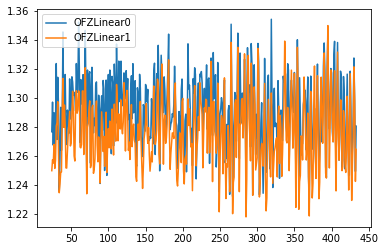

Smooth_15_0_1_OOBKBZ_res2.p
Rot_vel 0.0 15.0
Smooth_15_0_1_OOBKBZ_res3.p
(420, 27)
OFZLinear0-OFZLinear1 Avg: 8.624482535932916 8.520881243020176 avg: 0.10360129291274056  delta: 8.572681889476545
OFZLinear2-OFZLinear3 Avg: 6.467604146903777 6.42551941660992 avg: 0.04208473029385651  delta: 6.446561781756849
OFZLinear4-OFZLinear5 Avg: 5.201013049926145 5.165073516378441 avg: 0.03593953354770374  delta: 5.183043283152292


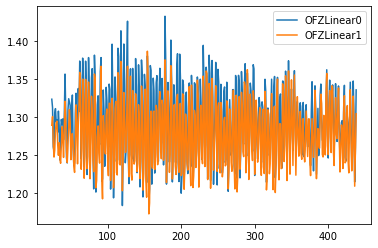

Smooth_15_0_2_MNBSLT_res2.p
Rot_vel 0.0 15.0
Smooth_15_0_2_MNBSLT_res3.p
(420, 27)
OFZLinear0-OFZLinear1 Avg: 8.547751948057034 8.442507607452402 avg: 0.1052443406046315  delta: 8.495129777754718
OFZLinear2-OFZLinear3 Avg: 6.409828377492448 6.367580826433304 avg: 0.042247551059143795  delta: 6.388704601962877
OFZLinear4-OFZLinear5 Avg: 5.154598858153674 5.120418384391603 avg: 0.03418047376207145  delta: 5.137508621272639


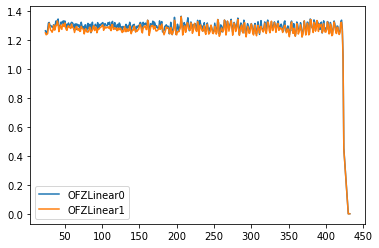

Smooth_15_0_3_VY12DF_res2.p
Rot_vel 0.0 15.0
Smooth_15_0_3_VY12DF_res3.p
(420, 27)
OFZLinear0-OFZLinear1 Avg: 8.632591010097519 8.521666953841365 avg: 0.1109240562561542  delta: 8.577128981969441
OFZLinear2-OFZLinear3 Avg: 6.467432617662422 6.422752488569083 avg: 0.04468012909333918  delta: 6.445092553115753
OFZLinear4-OFZLinear5 Avg: 5.200915020632457 5.163705645794849 avg: 0.03720937483760789  delta: 5.182310333213653


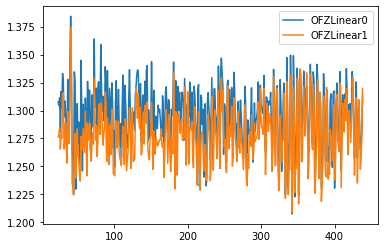

Smooth_15_0_4_46CIDO_res2.p
Rot_vel 0.0 15.0
Smooth_15_0_4_46CIDO_res3.p
(420, 27)
OFZLinear0-OFZLinear1 Avg: 8.636153546681843 8.524160011705147 avg: 0.11199353497669584  delta: 8.580156779193494
OFZLinear2-OFZLinear3 Avg: 6.4710884362339485 6.4248292120584996 avg: 0.04625922417544892  delta: 6.447958824146224
OFZLinear4-OFZLinear5 Avg: 5.204185421687053 5.165504353113442 avg: 0.0386810685736112  delta: 5.1848448874002475


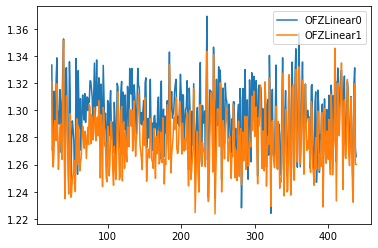

Smooth_30_-2_0_07HKRJ_res2.p
Rot_vel -2.0 30.0
Smooth_30_-2_0_07HKRJ_res3.p
(201, 27)
OFZLinear0-OFZLinear1 Avg: 8.947504644058952 8.48860093529708 avg: 0.4589037087618717  delta: 8.718052789678016
OFZLinear2-OFZLinear3 Avg: 6.800422740754768 6.524766634182242 avg: 0.2756561065725256  delta: 6.662594687468506
OFZLinear4-OFZLinear5 Avg: 5.558383522366518 5.368703531971081 avg: 0.1896799903954367  delta: 5.4635435271688


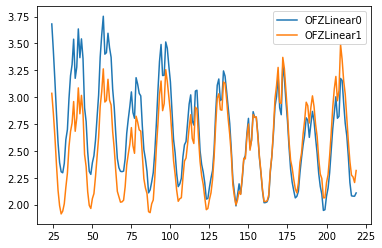

Smooth_30_-2_1_UA678T_res2.p
Rot_vel -2.0 30.0
Smooth_30_-2_1_UA678T_res3.p
(201, 27)
OFZLinear0-OFZLinear1 Avg: 9.005653379558515 8.52063370177094 avg: 0.4850196777875748  delta: 8.763143540664728
OFZLinear2-OFZLinear3 Avg: 6.849890884109255 6.560213536596655 avg: 0.2896773475126002  delta: 6.705052210352955
OFZLinear4-OFZLinear5 Avg: 5.609489322758552 5.408785646455352 avg: 0.20070367630319996  delta: 5.509137484606953


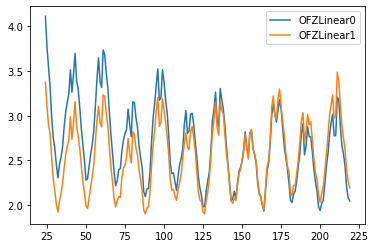

Smooth_30_-2_2_Z2CEPT_res2.p
Rot_vel -2.0 30.0
Smooth_30_-2_2_Z2CEPT_res3.p
(201, 27)
OFZLinear0-OFZLinear1 Avg: 9.00739031689956 8.52345906090391 avg: 0.4839312559956497  delta: 8.765424688901735
OFZLinear2-OFZLinear3 Avg: 6.850356645559527 6.56064691426011 avg: 0.2897097312994177  delta: 6.705501779909818
OFZLinear4-OFZLinear5 Avg: 5.6087921824678215 5.4067570842648704 avg: 0.20203509820295107  delta: 5.5077746333663455


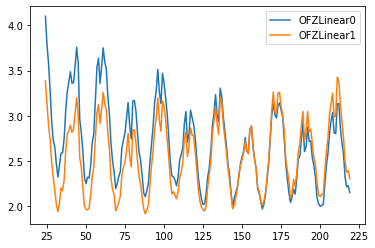

Smooth_30_-2_3_DPNF63_res2.p
Rot_vel -2.0 30.0
Smooth_30_-2_3_DPNF63_res3.p
(201, 27)
OFZLinear0-OFZLinear1 Avg: 9.001938210367218 8.521220785184044 avg: 0.4807174251831743  delta: 8.761579497775632
OFZLinear2-OFZLinear3 Avg: 6.847613593243623 6.55774477386672 avg: 0.28986881937690345  delta: 6.702679183555171
OFZLinear4-OFZLinear5 Avg: 5.606682212016121 5.404902297170863 avg: 0.20177991484525837  delta: 5.5057922545934925


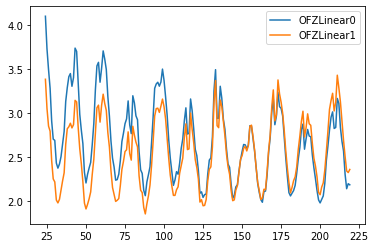

Smooth_30_-2_4_O2G6SZ_res2.p
Rot_vel -2.0 30.0
Smooth_30_-2_4_O2G6SZ_res3.p
(201, 27)
OFZLinear0-OFZLinear1 Avg: 8.985467838066988 8.509314494915838 avg: 0.4761533431511502  delta: 8.747391166491413
OFZLinear2-OFZLinear3 Avg: 6.830760119256611 6.546844115390965 avg: 0.2839160038656461  delta: 6.688802117323789
OFZLinear4-OFZLinear5 Avg: 5.592990378971113 5.396018551079189 avg: 0.19697182789192347  delta: 5.494504465025151


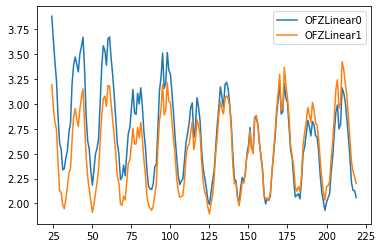

Smooth_30_-4_0_9WKFQF_res2.p
Rot_vel -4.0 30.0
Smooth_30_-4_0_9WKFQF_res3.p
(138, 27)
OFZLinear0-OFZLinear1 Avg: 8.960708246269288 8.74917360508211 avg: 0.21153464118717835  delta: 8.854940925675699
OFZLinear2-OFZLinear3 Avg: 6.725645269444438 6.629530025276618 avg: 0.09611524416782036  delta: 6.677587647360529
OFZLinear4-OFZLinear5 Avg: 5.400355483660578 5.340575149906771 avg: 0.05978033375380676  delta: 5.370465316783674


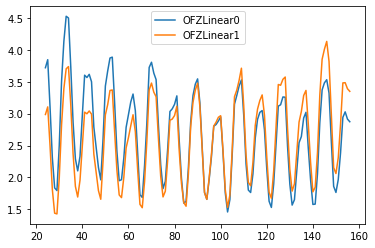

Smooth_30_-4_1_B6QVWT_res2.p
Rot_vel -4.0 30.0
Smooth_30_-4_1_B6QVWT_res3.p
(138, 27)
OFZLinear0-OFZLinear1 Avg: 9.161078014380793 8.643831312358715 avg: 0.5172467020220779  delta: 8.902454663369754
OFZLinear2-OFZLinear3 Avg: 6.827576905397572 6.548947603459777 avg: 0.27862930193779434  delta: 6.6882622544286745
OFZLinear4-OFZLinear5 Avg: 5.490523668438275 5.3110842161994976 avg: 0.17943945223877744  delta: 5.400803942318886


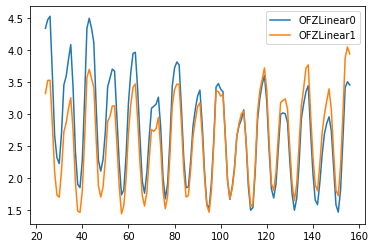

Smooth_30_-4_2_9YG7KZ_res2.p
Rot_vel -4.0 30.0
Smooth_30_-4_2_9YG7KZ_res3.p
(138, 27)
OFZLinear0-OFZLinear1 Avg: 9.187013174913675 8.669020983707137 avg: 0.5179921912065382  delta: 8.928017079310406
OFZLinear2-OFZLinear3 Avg: 6.852303607655904 6.572952050499185 avg: 0.2793515571567191  delta: 6.712627829077545
OFZLinear4-OFZLinear5 Avg: 5.511546285049439 5.333359167129352 avg: 0.17818711792008735  delta: 5.4224527260893955


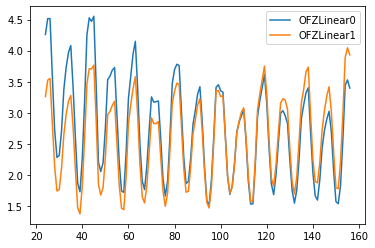

Smooth_30_-4_3_ZZ3YEH_res2.p
Rot_vel -4.0 30.0
Smooth_30_-4_3_ZZ3YEH_res3.p
(138, 27)
OFZLinear0-OFZLinear1 Avg: 9.178132465544921 8.679861940582544 avg: 0.49827052496237734  delta: 8.928997203063734
OFZLinear2-OFZLinear3 Avg: 6.8464351844058555 6.57899207486045 avg: 0.26744310954540573  delta: 6.712713629633153
OFZLinear4-OFZLinear5 Avg: 5.512351139618503 5.344142584396347 avg: 0.16820855522215616  delta: 5.428246862007425


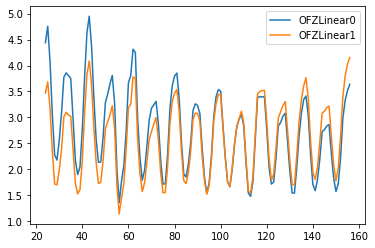

Smooth_30_-4_4_ARXESZ_res2.p
Rot_vel -4.0 30.0
Smooth_30_-4_4_ARXESZ_res3.p
(138, 27)
OFZLinear0-OFZLinear1 Avg: 9.189918521092698 8.663289558703587 avg: 0.5266289623891112  delta: 8.926604039898143
OFZLinear2-OFZLinear3 Avg: 6.84840436955058 6.56431926174565 avg: 0.28408510780492957  delta: 6.7063618156481155
OFZLinear4-OFZLinear5 Avg: 5.508742103082563 5.327783962387074 avg: 0.18095814069548855  delta: 5.418263032734819


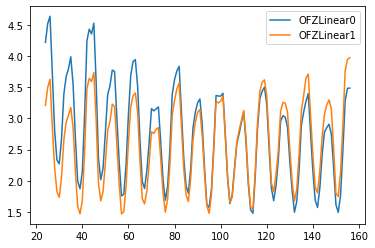

Smooth_30_-6_0_HOA2A3_res2.p
Rot_vel -6.0 30.0
Smooth_30_-6_0_HOA2A3_res3.p
(86, 27)
OFZLinear0-OFZLinear1 Avg: 8.919619529633225 8.388680091229697 avg: 0.5309394384035286  delta: 8.654149810431461
OFZLinear2-OFZLinear3 Avg: 6.630203590064351 6.326161499353973 avg: 0.3040420907103778  delta: 6.478182544709162
OFZLinear4-OFZLinear5 Avg: 5.313900579307473 5.121199018232285 avg: 0.19270156107518854  delta: 5.217549798769879


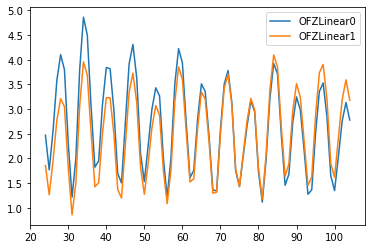

Smooth_30_-6_1_2F304V_res2.p
Rot_vel -6.0 30.0
Smooth_30_-6_1_2F304V_res3.p
(86, 27)
OFZLinear0-OFZLinear1 Avg: 8.945972273585236 8.431216851241766 avg: 0.5147554223434696  delta: 8.6885945624135
OFZLinear2-OFZLinear3 Avg: 6.650641723951215 6.368184773652996 avg: 0.2824569502982186  delta: 6.5094132488021055
OFZLinear4-OFZLinear5 Avg: 5.336651625725896 5.162758620521042 avg: 0.17389300520485396  delta: 5.249705123123469


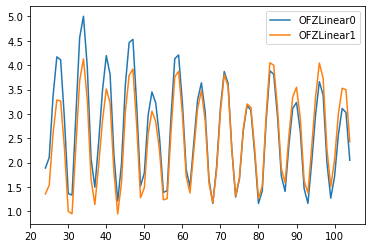

Smooth_30_-6_2_R5OVIS_res2.p
Rot_vel -6.0 30.0
Smooth_30_-6_2_R5OVIS_res3.p
(86, 27)
OFZLinear0-OFZLinear1 Avg: 8.960538655590678 8.433344136328651 avg: 0.5271945192620269  delta: 8.696941395959666
OFZLinear2-OFZLinear3 Avg: 6.665919869500385 6.373577229445164 avg: 0.2923426400552209  delta: 6.519748549472775
OFZLinear4-OFZLinear5 Avg: 5.353553231212689 5.166307108161031 avg: 0.18724612305165778  delta: 5.25993016968686


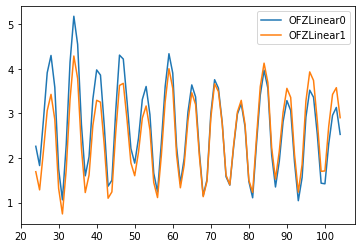

Smooth_30_-6_3_7A1JE7_res2.p
Rot_vel -6.0 30.0
Smooth_30_-6_3_7A1JE7_res3.p
(86, 27)
OFZLinear0-OFZLinear1 Avg: 8.96786932244479 8.434761954487408 avg: 0.5331073679573812  delta: 8.701315638466099
OFZLinear2-OFZLinear3 Avg: 6.672804180214014 6.373446888028917 avg: 0.2993572921850971  delta: 6.523125534121466
OFZLinear4-OFZLinear5 Avg: 5.359637385213882 5.170645582974071 avg: 0.18899180223981116  delta: 5.265141484093977


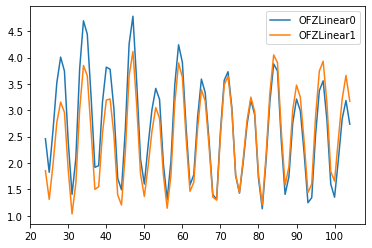

Smooth_30_-6_4_YKIR3Y_res2.p
Rot_vel -6.0 30.0
Smooth_30_-6_4_YKIR3Y_res3.p
(86, 27)
OFZLinear0-OFZLinear1 Avg: 8.909568635987526 8.391656910506725 avg: 0.5179117254808006  delta: 8.650612773247126
OFZLinear2-OFZLinear3 Avg: 6.6140187305019085 6.328335621872111 avg: 0.2856831086297973  delta: 6.47117717618701
OFZLinear4-OFZLinear5 Avg: 5.300262875387766 5.117214637150503 avg: 0.18304823823726313  delta: 5.208738756269135


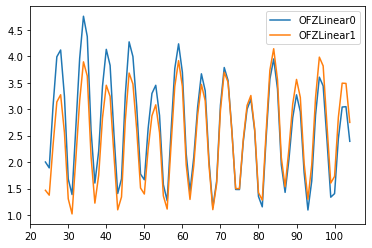

Smooth_30_0_0_TOWEUT_res2.p
Rot_vel 0.0 30.0
Smooth_30_0_0_TOWEUT_res3.p
(201, 27)
OFZLinear0-OFZLinear1 Avg: 8.82066054814527 8.480067808611864 avg: 0.3405927395334061  delta: 8.650364178378567
OFZLinear2-OFZLinear3 Avg: 6.571167551335834 6.400429985555661 avg: 0.17073756578017285  delta: 6.485798768445747
OFZLinear4-OFZLinear5 Avg: 5.304084172865161 5.177249525274549 avg: 0.12683464759061192  delta: 5.240666849069855


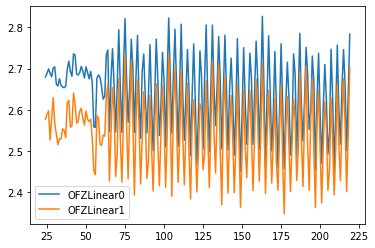

Smooth_30_0_1_RB5B21_res2.p
Rot_vel 0.0 30.0
Smooth_30_0_1_RB5B21_res3.p
(201, 27)
OFZLinear0-OFZLinear1 Avg: 8.815406471693596 8.477150193688008 avg: 0.3382562780055878  delta: 8.646278332690802
OFZLinear2-OFZLinear3 Avg: 6.560008681955792 6.387803447084363 avg: 0.1722052348714289  delta: 6.473906064520078
OFZLinear4-OFZLinear5 Avg: 5.297769078997527 5.170889462338013 avg: 0.1268796166595143  delta: 5.23432927066777


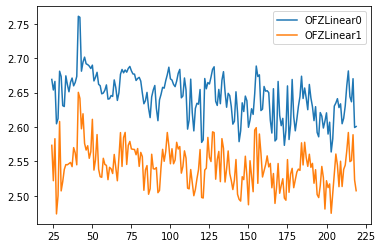

Smooth_30_0_2_AAU13M_res2.p
Rot_vel 0.0 30.0
Smooth_30_0_2_AAU13M_res3.p
(201, 27)
OFZLinear0-OFZLinear1 Avg: 8.818092293479815 8.47802219747686 avg: 0.3400700960029539  delta: 8.648057245478338
OFZLinear2-OFZLinear3 Avg: 6.561706858832821 6.389718301036732 avg: 0.17198855779608913  delta: 6.475712579934776
OFZLinear4-OFZLinear5 Avg: 5.300951158108354 5.173465704836812 avg: 0.12748545327154215  delta: 5.237208431472583


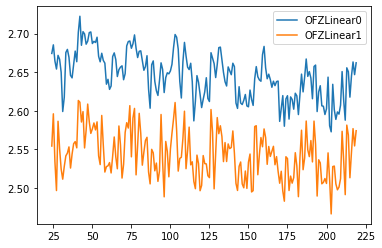

Smooth_30_0_3_STATJY_res2.p
Rot_vel 0.0 30.0
Smooth_30_0_3_STATJY_res3.p
(201, 27)
OFZLinear0-OFZLinear1 Avg: 8.819927865145157 8.479803439711226 avg: 0.34012442543393107  delta: 8.649865652428192
OFZLinear2-OFZLinear3 Avg: 6.561929980913798 6.389916087088941 avg: 0.17201389382485743  delta: 6.47592303400137
OFZLinear4-OFZLinear5 Avg: 5.299907825431045 5.172153125409366 avg: 0.1277547000216792  delta: 5.236030475420206


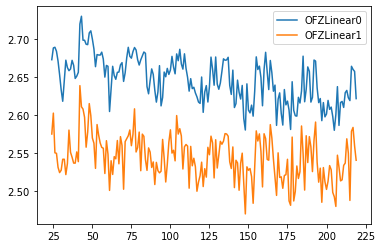

Smooth_30_0_4_YKCRBC_res2.p
Rot_vel 0.0 30.0
Smooth_30_0_4_YKCRBC_res3.p
(201, 27)
OFZLinear0-OFZLinear1 Avg: 8.818895208592318 8.479279048588811 avg: 0.3396161600035068  delta: 8.649087128590565
OFZLinear2-OFZLinear3 Avg: 6.562054775604585 6.390239071278344 avg: 0.1718157043262405  delta: 6.476146923441465
OFZLinear4-OFZLinear5 Avg: 5.299893968364819 5.172589074592201 avg: 0.12730489377261822  delta: 5.23624152147851


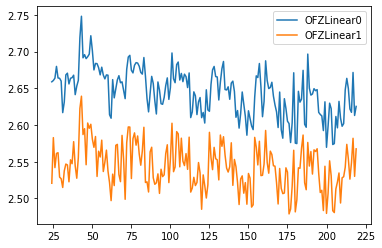

Smooth_45_-2_0_3P4T66_res2.p
Rot_vel -2.0 45.0
Smooth_45_-2_0_3P4T66_res3.p
(127, 27)
OFZLinear0-OFZLinear1 Avg: 8.913517738519964 8.46838790979315 avg: 0.44512982872681484  delta: 8.690952824156557
OFZLinear2-OFZLinear3 Avg: 6.728372487660931 6.479567245555288 avg: 0.24880524210564303  delta: 6.60396986660811
OFZLinear4-OFZLinear5 Avg: 5.481873469866565 5.300586289773937 avg: 0.18128718009262812  delta: 5.391229879820251


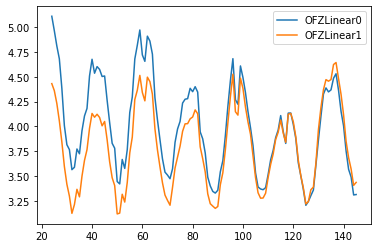

Smooth_45_-2_1_JFT8WZ_res2.p
Rot_vel -2.0 45.0
Smooth_45_-2_1_JFT8WZ_res3.p
(127, 27)
OFZLinear0-OFZLinear1 Avg: 8.913900708866239 8.470351924619758 avg: 0.4435487842464809  delta: 8.692126316742998
OFZLinear2-OFZLinear3 Avg: 6.727443788469106 6.479312243344459 avg: 0.24813154512464664  delta: 6.603378015906783
OFZLinear4-OFZLinear5 Avg: 5.481052756444831 5.302184156700449 avg: 0.17886859974438263  delta: 5.39161845657264


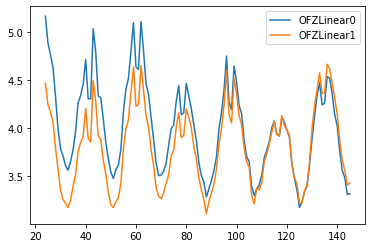

Smooth_45_-2_2_XM1ETY_res2.p
Rot_vel -2.0 45.0
Smooth_45_-2_2_XM1ETY_res3.p
(127, 27)
OFZLinear0-OFZLinear1 Avg: 8.894260879330616 8.46123326686027 avg: 0.4330276124703456  delta: 8.677747073095443
OFZLinear2-OFZLinear3 Avg: 6.712969825411149 6.470912746858287 avg: 0.24205707855286196  delta: 6.591941286134718
OFZLinear4-OFZLinear5 Avg: 5.466434319441287 5.291173590832724 avg: 0.17526072860856345  delta: 5.3788039551370055


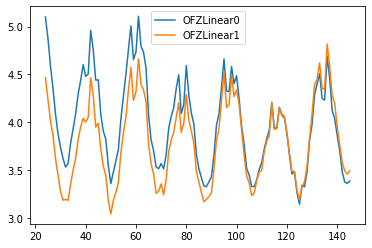

Smooth_45_-2_3_BR9Z93_res2.p
Rot_vel -2.0 45.0
Smooth_45_-2_3_BR9Z93_res3.p
(127, 27)
OFZLinear0-OFZLinear1 Avg: 8.901279267348894 8.464872097903262 avg: 0.43640716944563174  delta: 8.683075682626079
OFZLinear2-OFZLinear3 Avg: 6.718392230818861 6.473631871288845 avg: 0.24476035953001585  delta: 6.596012051053853
OFZLinear4-OFZLinear5 Avg: 5.47216013112476 5.296167682943885 avg: 0.17599244818087456  delta: 5.384163907034322


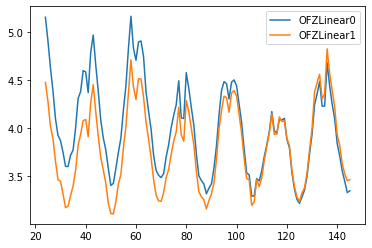

Smooth_45_-2_4_OZMRTY_res2.p
Rot_vel -2.0 45.0
Smooth_45_-2_4_OZMRTY_res3.p
(127, 27)
OFZLinear0-OFZLinear1 Avg: 8.905387852299592 8.466628638218108 avg: 0.4387592140814842  delta: 8.68600824525885
OFZLinear2-OFZLinear3 Avg: 6.721947746681746 6.476324443403618 avg: 0.2456233032781281  delta: 6.599136095042682
OFZLinear4-OFZLinear5 Avg: 5.471996549744803 5.294556423859896 avg: 0.17744012588490765  delta: 5.38327648680235


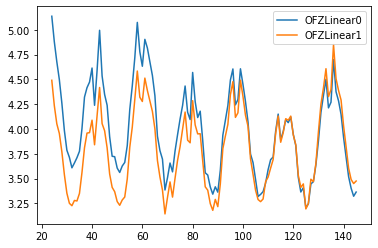

Smooth_45_-4_0_GNGX25_res2.p
Rot_vel -4.0 45.0
Smooth_45_-4_0_GNGX25_res3.p
(127, 27)
OFZLinear0-OFZLinear1 Avg: 9.08407581759547 8.611929773345462 avg: 0.4721460442500085  delta: 8.848002795470467
OFZLinear2-OFZLinear3 Avg: 6.74142973801147 6.490928115829632 avg: 0.25050162218183747  delta: 6.616178926920551
OFZLinear4-OFZLinear5 Avg: 5.402035003621345 5.238905581664385 avg: 0.16312942195695967  delta: 5.320470292642865


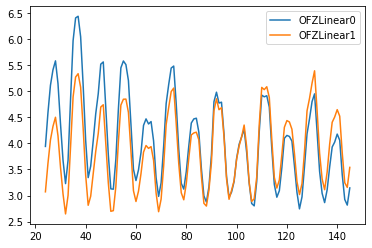

Smooth_45_-4_1_DPV5FD_res2.p
Rot_vel -4.0 45.0
Smooth_45_-4_1_DPV5FD_res3.p
(127, 27)
OFZLinear0-OFZLinear1 Avg: 9.099479519671121 8.600969443312916 avg: 0.49851007635820466  delta: 8.850224481492019
OFZLinear2-OFZLinear3 Avg: 6.747106431486688 6.481612248814297 avg: 0.26549418267239044  delta: 6.614359340150493
OFZLinear4-OFZLinear5 Avg: 5.409024076875425 5.2392444658564585 avg: 0.16977961101896621  delta: 5.324134271365942


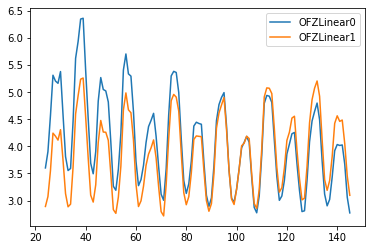

Smooth_45_-4_2_BZ37KH_res2.p
Rot_vel -4.0 45.0
Smooth_45_-4_2_BZ37KH_res3.p
(127, 27)
OFZLinear0-OFZLinear1 Avg: 9.097731610839002 8.603578218537669 avg: 0.4941533923013335  delta: 8.850654914688334
OFZLinear2-OFZLinear3 Avg: 6.74848994600802 6.484547040092314 avg: 0.26394290591570524  delta: 6.616518493050167
OFZLinear4-OFZLinear5 Avg: 5.407459621461428 5.2363629871021065 avg: 0.17109663435932188  delta: 5.321911304281768


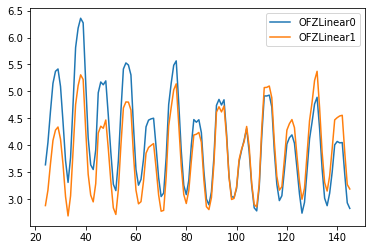

Smooth_45_-4_3_GRNIXW_res2.p
Rot_vel -4.0 45.0
Smooth_45_-4_3_GRNIXW_res3.p
(127, 27)
OFZLinear0-OFZLinear1 Avg: 9.107639059581238 8.599967441504882 avg: 0.5076716180763565  delta: 8.85380325054306
OFZLinear2-OFZLinear3 Avg: 6.757101630888316 6.485946104907257 avg: 0.27115552598105896  delta: 6.621523867897787
OFZLinear4-OFZLinear5 Avg: 5.415172790894172 5.242728318735308 avg: 0.1724444721588636  delta: 5.32895055481474


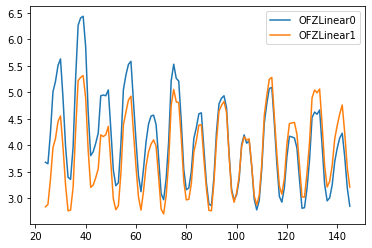

Smooth_45_-4_4_810HRV_res2.p
Rot_vel -4.0 45.0
Smooth_45_-4_4_810HRV_res3.p
(127, 27)
OFZLinear0-OFZLinear1 Avg: 9.094055589620355 8.603841612233234 avg: 0.49021397738712125  delta: 8.848948600926795
OFZLinear2-OFZLinear3 Avg: 6.745480406511948 6.481716412644054 avg: 0.2637639938678946  delta: 6.613598409578001
OFZLinear4-OFZLinear5 Avg: 5.407240860510614 5.2379300198616505 avg: 0.16931084064896318  delta: 5.322585440186132


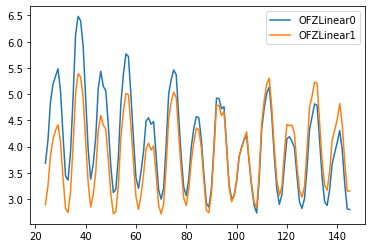

Smooth_45_-6_0_R378Z4_res2.p
Rot_vel -6.0 45.0
Smooth_45_-6_0_R378Z4_res3.p
(86, 27)
OFZLinear0-OFZLinear1 Avg: 9.02605891921988 8.52943904215479 avg: 0.4966198770650898  delta: 8.777748980687335
OFZLinear2-OFZLinear3 Avg: 6.714556590147108 6.4385455469242086 avg: 0.2760110432228995  delta: 6.576551068535658
OFZLinear4-OFZLinear5 Avg: 5.385703190322176 5.212619500039365 avg: 0.17308369028281145  delta: 5.299161345180771


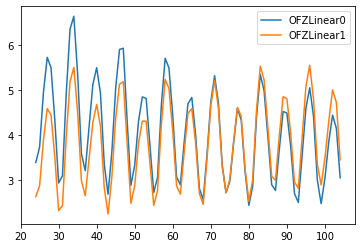

Smooth_45_-6_1_0NECPK_res2.p
Rot_vel -6.0 45.0
Smooth_45_-6_1_0NECPK_res3.p
(86, 27)
OFZLinear0-OFZLinear1 Avg: 9.019173021477494 8.534237474293327 avg: 0.48493554718416654  delta: 8.77670524788541
OFZLinear2-OFZLinear3 Avg: 6.7021758572748045 6.43285894436947 avg: 0.2693169129053343  delta: 6.567517400822137
OFZLinear4-OFZLinear5 Avg: 5.374673950664476 5.2038101028802215 avg: 0.17086384778425412  delta: 5.289242026772349


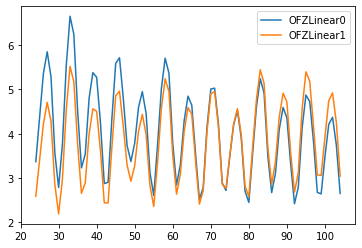

Smooth_45_-6_2_U2KIG0_res2.p
Rot_vel -6.0 45.0
Smooth_45_-6_2_U2KIG0_res3.p
(86, 27)
OFZLinear0-OFZLinear1 Avg: 9.04109123601104 8.536922573847281 avg: 0.5041686621637584  delta: 8.78900690492916
OFZLinear2-OFZLinear3 Avg: 6.724811185410025 6.445038472980749 avg: 0.2797727124292759  delta: 6.584924829195387
OFZLinear4-OFZLinear5 Avg: 5.3954398849586465 5.2171778656559455 avg: 0.1782620193027009  delta: 5.3063088753072964


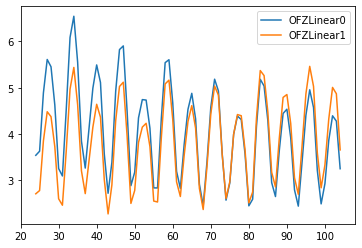

Smooth_45_-6_3_9UF74H_res2.p
Rot_vel -6.0 45.0
Smooth_45_-6_3_9UF74H_res3.p
(86, 27)
OFZLinear0-OFZLinear1 Avg: 9.028005393211714 8.537761087261913 avg: 0.4902443059498012  delta: 8.782883240236814
OFZLinear2-OFZLinear3 Avg: 6.713737151233981 6.439996175989521 avg: 0.2737409752444604  delta: 6.576866663611751
OFZLinear4-OFZLinear5 Avg: 5.388353820687686 5.214450981094378 avg: 0.17390283959330777  delta: 5.301402400891032


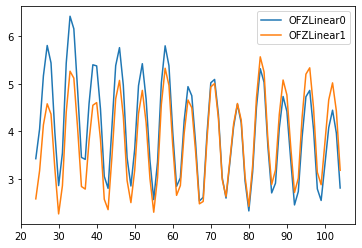

Smooth_45_-6_4_WAKIAQ_res2.p
Rot_vel -6.0 45.0
Smooth_45_-6_4_WAKIAQ_res3.p
(86, 27)
OFZLinear0-OFZLinear1 Avg: 9.06273304540885 8.5371825185564 avg: 0.5255505268524505  delta: 8.799957781982624
OFZLinear2-OFZLinear3 Avg: 6.747737010863716 6.448419735439227 avg: 0.2993172754244888  delta: 6.598078373151472
OFZLinear4-OFZLinear5 Avg: 5.417301578077564 5.2287103263903605 avg: 0.18859125168720325  delta: 5.323005952233962


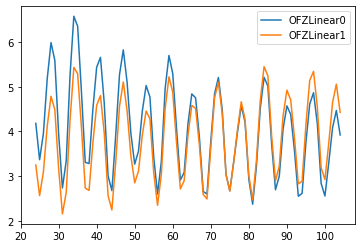

Smooth_45_0_0_V4SN9S_res2.p
Rot_vel 0.0 45.0
Smooth_45_0_0_V4SN9S_res3.p
(127, 27)
OFZLinear0-OFZLinear1 Avg: 8.823053141977836 8.48092210748808 avg: 0.34213103448975524  delta: 8.651987624732957
OFZLinear2-OFZLinear3 Avg: 6.573854343921543 6.403808732718935 avg: 0.17004561120260764  delta: 6.488831538320239
OFZLinear4-OFZLinear5 Avg: 5.290874861628632 5.167241183352166 avg: 0.12363367827646599  delta: 5.229058022490399


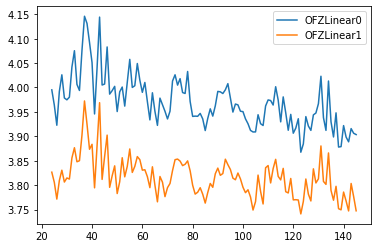

Smooth_45_0_1_IGTHOY_res2.p
Rot_vel 0.0 45.0
Smooth_45_0_1_IGTHOY_res3.p
(127, 27)
OFZLinear0-OFZLinear1 Avg: 8.81615245277113 8.474027854280177 avg: 0.3421245984909529  delta: 8.645090153525654
OFZLinear2-OFZLinear3 Avg: 6.564339418880276 6.394882849222541 avg: 0.1694565696577346  delta: 6.479611134051408
OFZLinear4-OFZLinear5 Avg: 5.280358239818358 5.158026205385969 avg: 0.1223320344323886  delta: 5.219192222602164


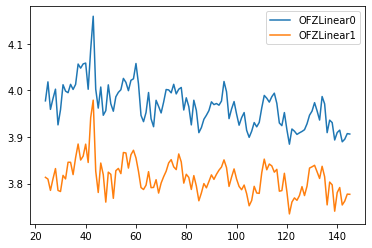

Smooth_45_0_2_B8A482_res2.p
Rot_vel 0.0 45.0
Smooth_45_0_2_B8A482_res3.p
(127, 27)
OFZLinear0-OFZLinear1 Avg: 8.813852343185786 8.473340609468833 avg: 0.3405117337169532  delta: 8.64359647632731
OFZLinear2-OFZLinear3 Avg: 6.563374978814187 6.393936826883118 avg: 0.16943815193106904  delta: 6.478655902848653
OFZLinear4-OFZLinear5 Avg: 5.279433358128171 5.157634147963671 avg: 0.12179921016449935  delta: 5.2185337530459215


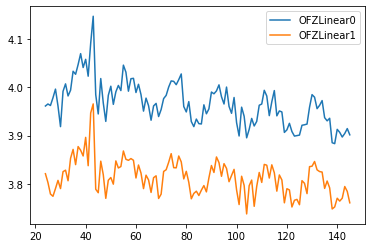

Smooth_45_0_3_9GBKOP_res2.p
Rot_vel 0.0 45.0
Smooth_45_0_3_9GBKOP_res3.p
(127, 27)
OFZLinear0-OFZLinear1 Avg: 8.813928159425386 8.47330043876106 avg: 0.340627720664326  delta: 8.643614299093223
OFZLinear2-OFZLinear3 Avg: 6.563357742323467 6.394368520851344 avg: 0.16898922147212225  delta: 6.4788631315874055
OFZLinear4-OFZLinear5 Avg: 5.27952578549828 5.156685437443912 avg: 0.1228403480543685  delta: 5.2181056114710955


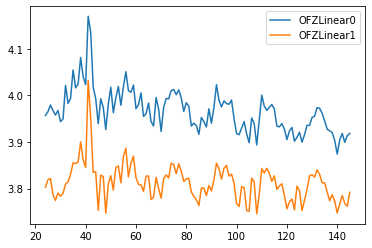

Smooth_45_0_4_SLPA8L_res2.p
Rot_vel 0.0 45.0
Smooth_45_0_4_SLPA8L_res3.p
(127, 27)
OFZLinear0-OFZLinear1 Avg: 8.814114838132875 8.473718036067943 avg: 0.34039680206493195  delta: 8.643916437100408
OFZLinear2-OFZLinear3 Avg: 6.5638990176397165 6.395063170101256 avg: 0.16883584753846037  delta: 6.479481093870486
OFZLinear4-OFZLinear5 Avg: 5.280121992628866 5.157872319004357 avg: 0.12224967362450823  delta: 5.218997155816611


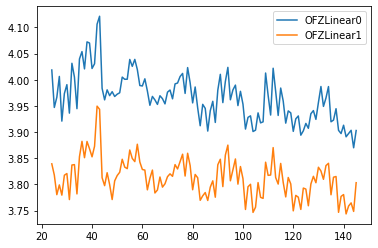

Smooth_60_-2_0_EENTSE_res2.p
Rot_vel -2.0 60.0
Smooth_60_-2_0_EENTSE_res3.p
(91, 27)
OFZLinear0-OFZLinear1 Avg: 8.839090507462775 8.40655146693616 avg: 0.4325390405266152  delta: 8.622820987199468
OFZLinear2-OFZLinear3 Avg: 6.628012126930082 6.3972736904641865 avg: 0.2307384364658951  delta: 6.512642908697134
OFZLinear4-OFZLinear5 Avg: 5.372808075084574 5.202806396122758 avg: 0.17000167896181573  delta: 5.287807235603666


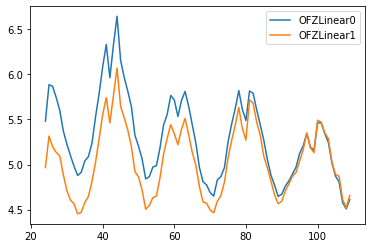

Smooth_60_-2_1_TOLJ0V_res2.p
Rot_vel -2.0 60.0
Smooth_60_-2_1_TOLJ0V_res3.p
(91, 27)
OFZLinear0-OFZLinear1 Avg: 8.82636141661198 8.401035461368371 avg: 0.4253259552436095  delta: 8.613698438990177
OFZLinear2-OFZLinear3 Avg: 6.616398751209426 6.392856171251503 avg: 0.2235425799579236  delta: 6.504627461230465
OFZLinear4-OFZLinear5 Avg: 5.365010307867204 5.19790491485247 avg: 0.16710539301473393  delta: 5.281457611359837


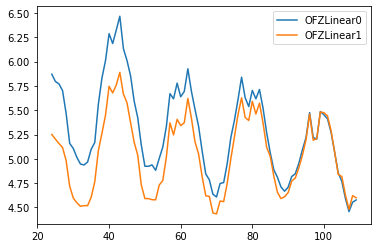

Smooth_60_-2_2_QJP3WV_res2.p
Rot_vel -2.0 60.0
Smooth_60_-2_2_QJP3WV_res3.p
(91, 27)
OFZLinear0-OFZLinear1 Avg: 8.843771153219567 8.40873862470022 avg: 0.43503252851934704  delta: 8.626254888959894
OFZLinear2-OFZLinear3 Avg: 6.629650973494821 6.399860904351325 avg: 0.22979006914349576  delta: 6.514755938923073
OFZLinear4-OFZLinear5 Avg: 5.378919540501983 5.207537936933018 avg: 0.1713816035689657  delta: 5.2932287387175005


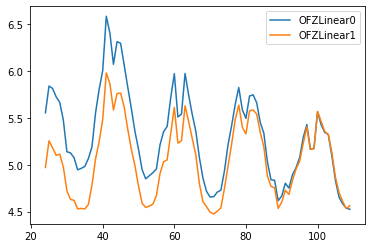

Smooth_60_-2_3_C9X5WP_res2.p
Rot_vel -2.0 60.0
Smooth_60_-2_3_C9X5WP_res3.p
(91, 27)
OFZLinear0-OFZLinear1 Avg: 8.828738305275188 8.402020699238994 avg: 0.4267176060361937  delta: 8.615379502257092
OFZLinear2-OFZLinear3 Avg: 6.6179696268725605 6.392875699779428 avg: 0.22509392709313225  delta: 6.505422663325994
OFZLinear4-OFZLinear5 Avg: 5.3670691517240465 5.198946907578162 avg: 0.16812224414588428  delta: 5.283008029651104


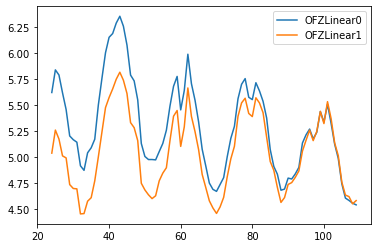

Smooth_60_-2_4_UX8ITL_res2.p
Rot_vel -2.0 60.0
Smooth_60_-2_4_UX8ITL_res3.p
(91, 27)
OFZLinear0-OFZLinear1 Avg: 8.84812482342665 8.411518578776931 avg: 0.43660624464971853  delta: 8.62982170110179
OFZLinear2-OFZLinear3 Avg: 6.633025317389743 6.4012267442722885 avg: 0.23179857311745433  delta: 6.517126030831015
OFZLinear4-OFZLinear5 Avg: 5.380916661101471 5.20859846328433 avg: 0.17231819781714108  delta: 5.294757562192901


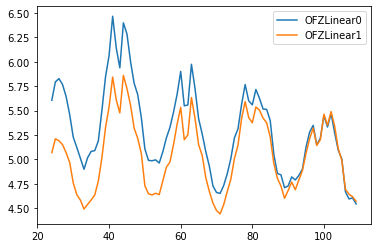

Smooth_60_-4_0_EVQ115_res2.p
Rot_vel -4.0 60.0
Smooth_60_-4_0_EVQ115_res3.p
(91, 27)
OFZLinear0-OFZLinear1 Avg: 8.929557120424267 8.486837288347457 avg: 0.44271983207680954  delta: 8.708197204385861
OFZLinear2-OFZLinear3 Avg: 6.625701725292021 6.38573901979913 avg: 0.239962705492891  delta: 6.505720372545576
OFZLinear4-OFZLinear5 Avg: 5.305496324277329 5.145156769078255 avg: 0.16033955519907384  delta: 5.225326546677792


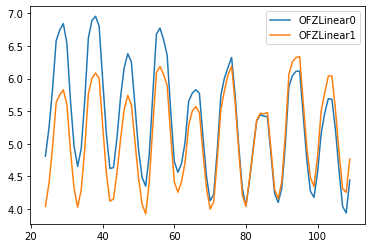

Smooth_60_-4_1_9CNJ4F_res2.p
Rot_vel -4.0 60.0
Smooth_60_-4_1_9CNJ4F_res3.p
(91, 27)
OFZLinear0-OFZLinear1 Avg: 8.929697460551395 8.47880968150152 avg: 0.4508877790498751  delta: 8.704253571026458
OFZLinear2-OFZLinear3 Avg: 6.619702906935511 6.374219560323594 avg: 0.24548334661191706  delta: 6.496961233629552
OFZLinear4-OFZLinear5 Avg: 5.303301715453027 5.137704993314661 avg: 0.16559672213836585  delta: 5.220503354383844


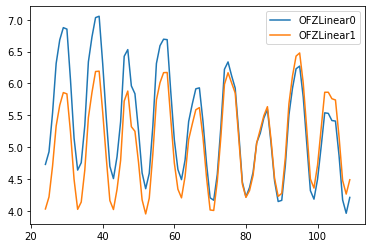

Smooth_60_-4_2_XJTK3X_res2.p
Rot_vel -4.0 60.0
Smooth_60_-4_2_XJTK3X_res3.p
(91, 27)
OFZLinear0-OFZLinear1 Avg: 8.930145320539548 8.479681671805372 avg: 0.45046364873417666  delta: 8.704913496172459
OFZLinear2-OFZLinear3 Avg: 6.620186596345625 6.376760860921579 avg: 0.24342573542404544  delta: 6.498473728633602
OFZLinear4-OFZLinear5 Avg: 5.302715392077436 5.137703579892558 avg: 0.16501181218487826  delta: 5.220209485984997


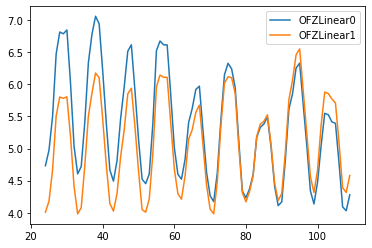

Smooth_60_-4_3_DDB2LK_res2.p
Rot_vel -4.0 60.0
Smooth_60_-4_3_DDB2LK_res3.p
(91, 27)
OFZLinear0-OFZLinear1 Avg: 8.931466449631218 8.475828266934824 avg: 0.45563818269639356  delta: 8.703647358283021
OFZLinear2-OFZLinear3 Avg: 6.620501129303717 6.373119557149308 avg: 0.24738157215440904  delta: 6.496810343226512
OFZLinear4-OFZLinear5 Avg: 5.303606481329539 5.137345948098489 avg: 0.16626053323104983  delta: 5.220476214714014


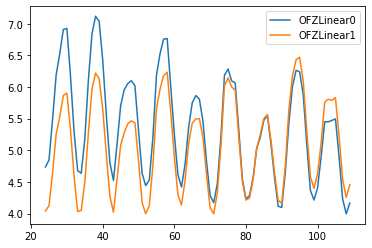

Smooth_60_-4_4_PPJSIF_res2.p
Rot_vel -4.0 60.0
Smooth_60_-4_4_PPJSIF_res3.p
(91, 27)
OFZLinear0-OFZLinear1 Avg: 8.931586453746409 8.475613807206681 avg: 0.4559726465397276  delta: 8.703600130476545
OFZLinear2-OFZLinear3 Avg: 6.621920990208113 6.373211713176451 avg: 0.24870927703166235  delta: 6.4975663516922815
OFZLinear4-OFZLinear5 Avg: 5.305522571359903 5.139267282628854 avg: 0.16625528873104933  delta: 5.222394926994379


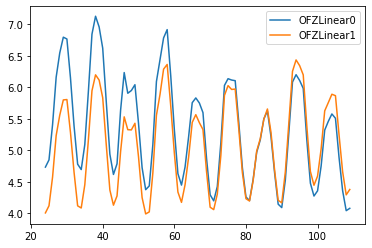

Smooth_60_-6_0_EO5Q0F_res2.p
Rot_vel -6.0 60.0
Smooth_60_-6_0_EO5Q0F_res3.p
(86, 27)
OFZLinear0-OFZLinear1 Avg: 9.084536659344613 8.556208740027044 avg: 0.5283279193175687  delta: 8.820372699685828
OFZLinear2-OFZLinear3 Avg: 6.745029948250464 6.447244695534847 avg: 0.2977852527156166  delta: 6.596137321892655
OFZLinear4-OFZLinear5 Avg: 5.408271727222977 5.2155552030227055 avg: 0.19271652420027152  delta: 5.311913465122841


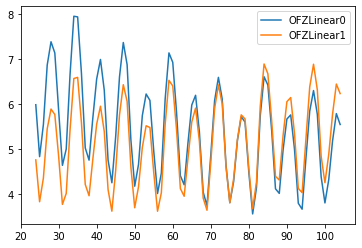

Smooth_60_-6_1_ITFYF8_res2.p
Rot_vel -6.0 60.0
Smooth_60_-6_1_ITFYF8_res3.p
(86, 27)
OFZLinear0-OFZLinear1 Avg: 9.071874921292578 8.556357505520603 avg: 0.5155174157719742  delta: 8.81411621340659
OFZLinear2-OFZLinear3 Avg: 6.732673210187251 6.444528570462436 avg: 0.2881446397248144  delta: 6.588600890324844
OFZLinear4-OFZLinear5 Avg: 5.397668854347841 5.213422312539783 avg: 0.18424654180805788  delta: 5.305545583443812


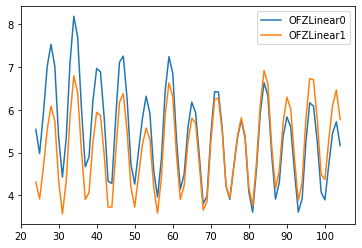

Smooth_60_-6_2_P77OMH_res2.p
Rot_vel -6.0 60.0
Smooth_60_-6_2_P77OMH_res3.p
(86, 27)
OFZLinear0-OFZLinear1 Avg: 9.06667592570182 8.561433974934843 avg: 0.5052419507669761  delta: 8.814054950318331
OFZLinear2-OFZLinear3 Avg: 6.729364134085944 6.447926009753348 avg: 0.2814381243325954  delta: 6.588645071919646
OFZLinear4-OFZLinear5 Avg: 5.396154745361933 5.2123944975281695 avg: 0.18376024783376366  delta: 5.304274621445051


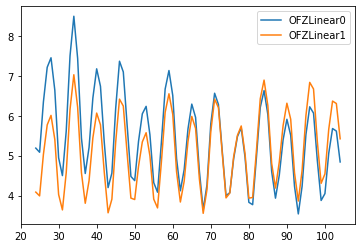

Smooth_60_-6_3_HY8MRS_res2.p
Rot_vel -6.0 60.0
Smooth_60_-6_3_HY8MRS_res3.p
(86, 27)
OFZLinear0-OFZLinear1 Avg: 9.069799700245284 8.557505468145663 avg: 0.5122942320996202  delta: 8.813652584195474
OFZLinear2-OFZLinear3 Avg: 6.73237480502638 6.445777917589298 avg: 0.28659688743708145  delta: 6.589076361307839
OFZLinear4-OFZLinear5 Avg: 5.398323297880825 5.212275294760363 avg: 0.18604800312046255  delta: 5.3052992963205945


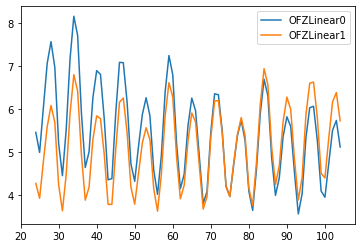

Smooth_60_-6_4_ONJJEZ_res2.p
Rot_vel -6.0 60.0
Smooth_60_-6_4_ONJJEZ_res3.p
(86, 27)
OFZLinear0-OFZLinear1 Avg: 9.044146008603292 8.557235957110889 avg: 0.4869100514924032  delta: 8.800690982857091
OFZLinear2-OFZLinear3 Avg: 6.712409759362516 6.441222602075126 avg: 0.2711871572873896  delta: 6.576816180718821
OFZLinear4-OFZLinear5 Avg: 5.375530555797153 5.20255780514036 avg: 0.1729727506567924  delta: 5.289044180468757


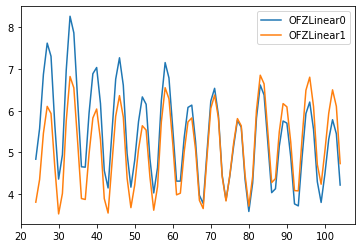

Smooth_60_0_0_6KASLJ_res2.p
Rot_vel 0.0 60.0
Smooth_60_0_0_6KASLJ_res3.p
(91, 27)
OFZLinear0-OFZLinear1 Avg: 8.823400042777838 8.488332680029464 avg: 0.335067362748374  delta: 8.65586636140365
OFZLinear2-OFZLinear3 Avg: 6.570884585380554 6.403294025465499 avg: 0.16759055991505534  delta: 6.4870893054230265
OFZLinear4-OFZLinear5 Avg: 5.298477938008863 5.17353381297385 avg: 0.12494412503501273  delta: 5.236005875491356


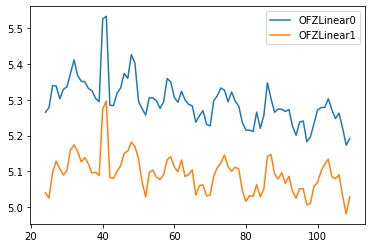

Smooth_60_0_1_H2CBPV_res2.p
Rot_vel 0.0 60.0
Smooth_60_0_1_H2CBPV_res3.p
(91, 27)
OFZLinear0-OFZLinear1 Avg: 8.818434245826662 8.483322803364244 avg: 0.3351114424624182  delta: 8.650878524595452
OFZLinear2-OFZLinear3 Avg: 6.564199000365973 6.397238840428433 avg: 0.1669601599375401  delta: 6.480718920397203
OFZLinear4-OFZLinear5 Avg: 5.2930990716283635 5.167609300724296 avg: 0.12548977090406765  delta: 5.23035418617633


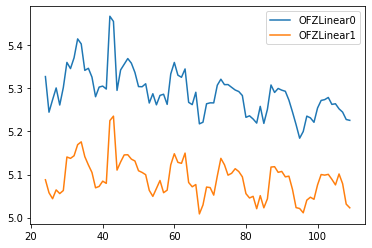

Smooth_60_0_2_HI1FZ4_res2.p
Rot_vel 0.0 60.0
Smooth_60_0_2_HI1FZ4_res3.p
(91, 27)
OFZLinear0-OFZLinear1 Avg: 8.815657353216363 8.48202523335006 avg: 0.33363211986630326  delta: 8.648841293283212
OFZLinear2-OFZLinear3 Avg: 6.56276035678479 6.3956697874290995 avg: 0.16709056935569055  delta: 6.479215072106944
OFZLinear4-OFZLinear5 Avg: 5.291450407153876 5.1669899761214735 avg: 0.12446043103240267  delta: 5.229220191637674


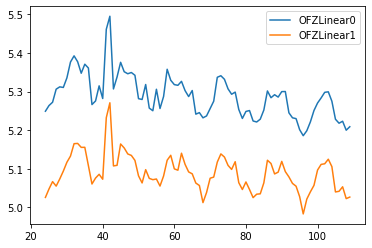

Smooth_60_0_3_0IMBF0_res2.p
Rot_vel 0.0 60.0
Smooth_60_0_3_0IMBF0_res3.p
(91, 27)
OFZLinear0-OFZLinear1 Avg: 8.816881863645804 8.482366282810537 avg: 0.33451558083526756  delta: 8.649624073228171
OFZLinear2-OFZLinear3 Avg: 6.56217095463775 6.395212023757225 avg: 0.16695893088052483  delta: 6.478691489197487
OFZLinear4-OFZLinear5 Avg: 5.291528794192528 5.16709119312523 avg: 0.12443760106729851  delta: 5.2293099936588785


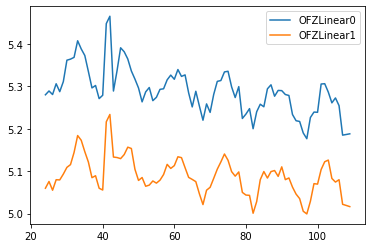

Smooth_60_0_4_XV9Y0W_res2.p
Rot_vel 0.0 60.0
Smooth_60_0_4_XV9Y0W_res3.p
(91, 27)
OFZLinear0-OFZLinear1 Avg: 8.817830344503239 8.483715260675712 avg: 0.33411508382752686  delta: 8.650772802589476
OFZLinear2-OFZLinear3 Avg: 6.562480603077615 6.394740879073623 avg: 0.16773972400399195  delta: 6.478610741075619
OFZLinear4-OFZLinear5 Avg: 5.291631106258363 5.167431480200715 avg: 0.12419962605764745  delta: 5.229531293229539


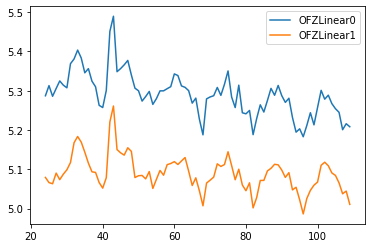

In [45]:
ff = 1.0

for file_name in data_files:
    # load the result file
    print(file_name)
    rot_vel = float(file_name.split('_')[2])
    lin_vel = float(file_name.split('_')[1])
    print('Rot_vel {} {}'.format(rot_vel, lin_vel))
    new_file_name = '{}_res3.p'.format(file_name[:-7])
    print(new_file_name)
    
    if rot_vel != 0:
        rotational_coeff = full_rotational_coeff_result.loc[rot_vel]
    else:
        rotational_coeff = full_rotational_coeff_result.loc[-2]
    
    if True:
        
        
        res = pickle.load(open('{}{}'.format(datadir, file_name), 'rb'))
        print(res.shape)

        for zone in range(6):    
            # Get x positions of the centers    
            res['OFZ{}x'.format(zone)] = res['OFC{}'.format(zone)].apply(lambda x: x[0]-mid_frame_x)

        for zone in range(6):    
            res['OFZLinear{}'.format(zone)] = (res['OFZ{}'.format(zone)] + 
                                        rotational_coeff['OFZ{}'.format(zone)]*rot_vel/
                                        (np.power(np.cos(np.arctan(ff*(res['OFZ{}x'.format(zone)]*chip/resolution)/f)),2.0)))




        # remove zero OF

        res = res[res['OFZLinear0']>0][:-5]
        for i in range(3):
            Z0 = 'OFZLinear{}'.format(i*2)
            Z1 = 'OFZLinear{}'.format(i*2+1)


            print('{}-{} Avg: {} {} avg: {}  delta: {}'.format(Z0,Z1,
                                                               res[Z0].mean()/lin_vel*100, 
                                                         res[Z1].mean()/lin_vel*100,
                             res[Z0].mean()/lin_vel*100-res[Z1].mean()/lin_vel*100,
                             (res[Z0].mean()/lin_vel*100+res[Z1].mean()/lin_vel*100)/2.))

        res[['OFZLinear0', 'OFZLinear1']].plot()
        plt.show()

        pickle.dump(res, open('{}{}'.format(datadir, new_file_name), 'wb'))

<AxesSubplot:>

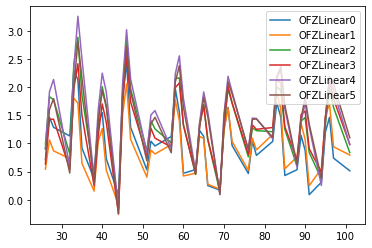

In [417]:
res[['OFZLinear0', 'OFZLinear1', 'OFZLinear2', 'OFZLinear3', 'OFZLinear4', 'OFZLinear5', ]].plot()

In [413]:
res.shape

(33, 39)